In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import svm
from tabulate import tabulate
from datetime import datetime, date 
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../nba_games_cleaned_with_avgs.csv', index_col = False)
df.head()

,game_id,date,team,total,team_opp,total_opp,won,fg,fga,fg%,...,opp_season_avg_ft%,opp_season_avg_orb,opp_season_avg_drb,opp_season_avg_trb,opp_season_avg_ast,opp_season_avg_stl,opp_season_avg_blk,opp_season_avg_tov,opp_season_avg_pf,opp_season_avg_pts
0,2015-10-27_ATL_DET,2015-10-27,DET,106,ATL,94,True,37.0,96.0,0.385,...,0.800,7.0,33.0,40.0,22.0,9.0,4.0,15.0,25.0,94.0
1,2015-10-27_ATL_DET,2015-10-27,ATL,94,DET,106,False,37.0,82.0,0.451,...,0.769,23.0,36.0,59.0,23.0,5.0,3.0,15.0,15.0,106.0
2,2015-10-27_CHI_CLE,2015-10-27,CLE,95,CHI,97,False,38.0,94.0,0.404,...,0.696,7.0,40.0,47.0,13.0,6.0,10.0,13.0,22.0,97.0
3,2015-10-27_CHI_CLE,2015-10-27,CHI,97,CLE,95,True,37.0,87.0,0.425,...,0.588,11.0,39.0,50.0,26.0,5.0,7.0,10.0,21.0,95.0
4,2015-10-27_GSW_NOP,2015-10-27,NOP,95,GSW,111,False,35.0,83.0,0.422,...,0.909,21.0,35.0,56.0,29.0,8.0,7.0,20.0,29.0,111.0


In [3]:
feature_selection = ['won', 'home', 'season_avg_fg', 'season_avg_fga', 'season_avg_fg%', 'season_avg_3p', 
                     'season_avg_3pa', 'season_avg_3p%', 'season_avg_ft', 'season_avg_fta', 'season_avg_ft%','season_avg_orb', 'season_avg_drb', 
                     'season_avg_trb', 'season_avg_ast', 'season_avg_stl', 'season_avg_blk', 'season_avg_tov', 'season_avg_pf', 'season_avg_pts',
                     'opp_season_avg_fg', 'opp_season_avg_fga', 'opp_season_avg_fg%','opp_season_avg_3p', 'opp_season_avg_3pa', 'opp_season_avg_3p%',
                     'opp_season_avg_ft', 'opp_season_avg_fta', 'opp_season_avg_ft%', 'opp_season_avg_orb', 'opp_season_avg_drb', 'opp_season_avg_trb',
                     'opp_season_avg_ast', 'opp_season_avg_stl', 'opp_season_avg_blk', 'opp_season_avg_tov', 'opp_season_avg_pf', 'opp_season_avg_pts']

df_filtered = df[feature_selection]
df_filtered.head()

,won,home,season_avg_fg,season_avg_fga,season_avg_fg%,season_avg_3p,season_avg_3pa,season_avg_3p%,season_avg_ft,season_avg_fta,...,opp_season_avg_ft%,opp_season_avg_orb,opp_season_avg_drb,opp_season_avg_trb,opp_season_avg_ast,opp_season_avg_stl,opp_season_avg_blk,opp_season_avg_tov,opp_season_avg_pf,opp_season_avg_pts
0,True,0,37.0,96.0,0.385,12.0,29.0,0.414,20.0,26.0,...,0.800,7.0,33.0,40.0,22.0,9.0,4.0,15.0,25.0,94.0
1,False,1,37.0,82.0,0.451,8.0,27.0,0.296,12.0,15.0,...,0.769,23.0,36.0,59.0,23.0,5.0,3.0,15.0,15.0,106.0
2,False,0,38.0,94.0,0.404,9.0,29.0,0.310,10.0,17.0,...,0.696,7.0,40.0,47.0,13.0,6.0,10.0,13.0,22.0,97.0
3,True,1,37.0,87.0,0.425,7.0,19.0,0.368,16.0,23.0,...,0.588,11.0,39.0,50.0,26.0,5.0,7.0,10.0,21.0,95.0
4,False,0,35.0,83.0,0.422,6.0,18.0,0.333,19.0,27.0,...,0.909,21.0,35.0,56.0,29.0,8.0,7.0,20.0,29.0,111.0


In [4]:
cor = df_filtered.corr()
cor_target = abs(cor["won"])
relevant_features = cor_target[cor_target>0.1]
relevant_features

won                   1.000000
home                  0.143372
season_avg_fg         0.141640
season_avg_fg%        0.195433
season_avg_3p%        0.150456
season_avg_drb        0.144892
season_avg_trb        0.118887
season_avg_ast        0.119379
season_avg_pts        0.155354
opp_season_avg_fg     0.141640
opp_season_avg_fg%    0.195433
opp_season_avg_3p%    0.150456
opp_season_avg_drb    0.144892
opp_season_avg_trb    0.118887
opp_season_avg_ast    0.119379
opp_season_avg_pts    0.155354
Name: won, dtype: float64

In [5]:
X = df_filtered[['home','season_avg_fg','season_avg_fg%','season_avg_3p%','season_avg_drb','season_avg_trb','season_avg_ast'
               ,'season_avg_pts','opp_season_avg_fg','opp_season_avg_fg%','opp_season_avg_3p%','opp_season_avg_drb'
               ,'opp_season_avg_trb','opp_season_avg_ast','opp_season_avg_pts']]
X = StandardScaler().fit_transform(X)
y = df_filtered['won']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [7]:
clf = svm.SVC(kernel = 'linear').fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [8]:
sv_precision, sv_recall, sv_f1, _ = precision_recall_fscore_support(y_test,y_pred,average='macro')
print("Precision:",sv_precision)
print("Recall:",sv_recall)
print("F1 Score:",sv_f1)

Precision: 0.6623571595805512
Recall: 0.6624115463629643
F1 Score: 0.6623574105962697


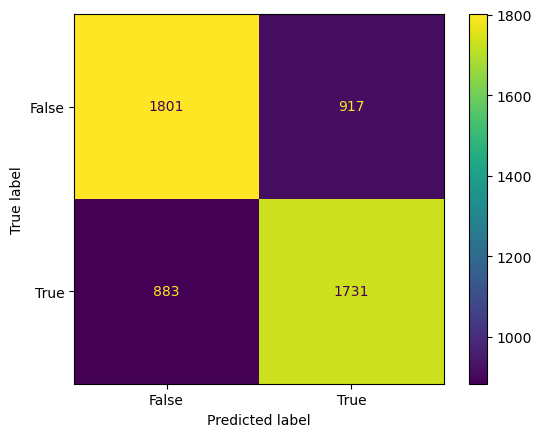

In [9]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
sv_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
sv_disp.plot()
plt.show()